In [1]:
!pip install modin[all]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 970.3/970.3 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.1/439.1 KB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━

In [2]:
import modin.pandas as pd
import pandas

#############################################
### For the purpose of timing comparisons ###
#############################################
import time
import ray
ray.init()
#############################################


2023-02-06 12:53:32,439	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Python version:,3.8.10
Ray version:,2.2.0
Dashboard:,http://127.0.0.1:8265


In [ ]:
df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})

In [ ]:
df.head()

,col1,col2
0,1,3
1,2,4


In [ ]:
import modin
modin.config.Engine.put("Dask")

To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()



In [ ]:
df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})

In [ ]:
df


,col1,col2
0,1,3
1,2,4


In [ ]:
#Modin is able to utilize Ray’s built-in autoscaled cluster. To launch a Ray cluster using Amazon Web Service (AWS), you can use this file as the config file.

In [ ]:
pip install boto3 aws configure

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 216 kB 46.6 MB/s 
     |████████████████████████████████| 213 kB 50.0 MB/s 
     |████████████████████████████████| 593 kB 68.3 MB/s 
     |████████████████████████████████| 4.0 MB 35.7 MB/s 
     |████████████████████████████████| 856 kB 51.1 MB/s 
  Created wheel for aws: filename=aws-0.2.5-py3-none-any.whl size=7460 sha256=72bf54d8ae3ff1520f21d4c7ce9b9041e484c4435f3986cf7b7dc56b5ec707f3
  Stored in directory: /root/.cache/pip/wheels/bc/92/fb/ee4b27c55c4e55e43d3fbb1f89699aeda162d3bf700fbba01a
  Created wheel for configure: filename=configure-0.5-py3-none-any.whl size=6493 sha256=cf319f5639cd56abbee055428d4c3ea321619f17e020e62977c4475a24228e06
  Stored in directory: /root/.cache/pip/wheels/7b/73/f8/616f624eb5464b524ed5fd930d9af9bcd59ac32

In [ ]:
start = time.time()

pandas_df = pandas.read_csv("/content/car_data.csv")

end = time.time()
pandas_duration = end - start
print("Time to read with pandas: {} seconds".format(round(pandas_duration, 3)))

Time to read with pandas: 0.081 seconds


In [ ]:
start = time.time()

modin_df = pd.read_csv("car_data.csv")

end = time.time()
modin_duration = end - start
print("Time to read with Modin: {} seconds".format(round(modin_duration, 3)))

#print("Modin is {}x faster than pandas at `read_csv`!".format(round(pandas_duration / modin_duration, 2)))

Time to read with Modin: 0.076 seconds


In [ ]:
pandas_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
start = time.time()

big_pandas_df = pandas.concat([pandas_df for _ in range(25)])

end = time.time()
pandas_duration = end - start
print("Time to concat with pandas: {} seconds".format(round(pandas_duration, 3)))

Time to concat with pandas: 0.019 seconds


In [ ]:
start = time.time()

big_modin_df = pd.concat([modin_df for _ in range(25)])

end = time.time()
modin_duration = end - start
print("Time to concat with Modin: {} seconds".format(round(modin_duration, 3)))

print("Modin is {}x faster than pandas at `concat`!".format(round(pandas_duration / modin_duration, 2)))

Time to concat with Modin: 0.015 seconds
Modin is 1.25x faster than pandas at `concat`!


In [ ]:
#number of columns
print(2**8)

256


In [ ]:
#number of rows 
print(2**10)

1024


In [ ]:
import modin.pandas as pd
import numpy as np

frame_data = np.random.randint(0, 100, size=(2**10, 2**8))
df = pd.DataFrame(frame_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,96,93,71,93,52,89,0,88,77,59,...,51,26,67,15,9,92,8,64,57,33
1,26,6,88,87,82,62,1,62,24,74,...,79,9,1,65,73,15,74,35,21,7
2,63,90,7,7,40,61,28,81,76,35,...,51,69,22,57,61,99,75,57,96,54
3,9,21,15,72,47,59,22,4,90,66,...,88,24,45,55,75,23,9,11,73,28
4,69,99,45,22,14,44,91,25,47,93,...,84,24,92,39,68,53,71,26,67,69


In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
1019,41,3,4,16,18,54,72,71,40,66,...,45,80,92,4,4,3,39,71,81,96
1020,39,66,63,91,16,98,72,53,23,24,...,7,85,0,81,85,39,49,41,87,8
1021,81,17,6,11,40,42,13,37,90,22,...,99,84,26,61,4,73,47,25,50,33
1022,65,15,63,90,95,81,38,9,65,61,...,81,85,66,85,21,6,99,56,63,37
1023,66,56,69,88,40,6,78,85,67,60,...,64,60,94,36,0,69,5,74,35,35


In [ ]:
start = time.time()

big_pandas_df = pandas.concat([pandas_df for _ in range(10000)])

end = time.time()
pandas_duration = end - start
print("Time to concat with pandas: {} seconds".format(round(pandas_duration, 3)))

Time to concat with pandas: 3.85 seconds


In [ ]:
start = time.time()

big_modin_df = pd.concat([modin_df for _ in range(10000)])

end = time.time()
modin_duration = end - start
print("Time to concat with Modin: {} seconds".format(round(modin_duration, 3)))

print("Modin is {}x faster than pandas at `concat`!".format(round(pandas_duration / modin_duration, 2)))

Time to concat with Modin: 0.907 seconds
Modin is 4.24x faster than pandas at `concat`!


In [ ]:
big_pandas_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
start = time.time()
rounded_trip_distance_pandas = big_pandas_df["Selling_Price"].apply(round)

end = time.time()
pandas_duration = end - start
print("Time to apply with pandas: {} seconds".format(round(pandas_duration, 3)))

Time to apply with pandas: 1.395 seconds


In [ ]:
start = time.time()

rounded_trip_distance_modin = big_modin_df["Selling_Price"].apply(round)

end = time.time()
modin_duration = end - start
print("Time to apply with Modin: {} seconds".format(round(modin_duration, 3)))

print("Modin is {}x faster than pandas at `apply` on one column!".format(round(pandas_duration / modin_duration, 2)))

Time to apply with Modin: 5.888 seconds
Modin is 0.24x faster than pandas at `apply` on one column!


In [ ]:
# linear regression using modlin 

In [ ]:
#import required libraryies 
import modin.pandas as pd

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn
#read data 
df = pd.read_csv('/content/Salary_Data.csv')
df.head(30)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
# check correlation between varibales  ; shows strong corelation 
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
# Divide it into input and output
#x = df.iloc[:,[0]].values
#y = df.iloc[:,1].values

x=df.drop('Salary',axis=1).values
y=df['Salary'].values 
# x (input) should  be in 2 dimension

In [ ]:
# Linear regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#1. Fitting the model : Mapping input with output
#2. Predict the values
start = time.time()
model.fit(x,y) # training your model
y_pred = model.predict(x) # Testing your model
end = time.time()
modin_duration = end - start
print("Time to apply with Modin: {} seconds".format(round(modin_duration, 3)))
#y_pred

Time to apply with Modin: 0.004 seconds


In [ ]:
#check time exceution using modlin for linear regrestion on same dataset 
#import required libraryies 
import modin.pandas as pd

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn
#read data 
df = pd.read_csv('/content/Salary_Data.csv')
#df.head(30)
# Divide it into input and output
#x = df.iloc[:,[0]].values
#y = df.iloc[:,1].values

x=df.drop('Salary',axis=1).values
y=df['Salary'].values 
# x (input) should  be in 2 dimension
# Linear regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#1. Fitting the model : Mapping input with output
#2. Predict the values
start = time.time()
model.fit(x,y) # training your model
y_pred = model.predict(x) # Testing your model
end = time.time()
modlin_duration = end - start
print("Time to trian and test model  with modlin: {} seconds".format(round(modlin_duration, 3)))
#y_pred

Time to trian and test model  with modlin: 0.001 seconds


In [ ]:
#check time exceution using pandas for linear regrestion on same dataset 
#import required libraryies 
import pandas as pd1

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn
#read data 
df = pd1.read_csv('/content/Salary_Data.csv')
#df.head(30)
# Divide it into input and output
#x = df.iloc[:,[0]].values
#y = df.iloc[:,1].values

x=df.drop('Salary',axis=1).values
y=df['Salary'].values 
# x (input) should  be in 2 dimension
# Linear regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#1. Fitting the model : Mapping input with output
#2. Predict the values
start = time.time()
model.fit(x,y) # training your model
y_pred = model.predict(x) # Testing your model
end = time.time()
pandas_duration = end - start
print("Time to trian and test model  with pandas: {} seconds".format(round(pandas_duration, 3)))
#y_pred

Time to trian and test model  with pandas: 0.001 seconds


pandas makes use of in-memory data structures to store and operate on data, which means that if you have a dataset that is too large to fit in memory, it will cause an error on pandas. As an example, let’s creates a 80GB DataFrame by appending together 40 different 2GB DataFrames.

In [ ]:
import pandas
import numpy as np
df = pandas.concat([pandas.DataFrame(np.random.randint(0, 100, size=(2**20, 2**8))) for _ in range(40)]) # Memory Error!

When we run this on a laptop with 32GB of RAM, pandas will run out of memory and throw an error (e.g., MemoryError , Killed: 9).

Operating on out-of-memory data with Modin
In order to work with data that exceeds memory constraints, you can use Modin to handle these large datasets.

In [ ]:
import modin.pandas as pd
import numpy as np
df = pd.concat([pd.DataFrame(np.random.randint(0, 100, size=(2**20, 2**8))) for _ in range(40)]) # 40x2GB frames -- Working!
df.info()

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init(runtime_env={'env_vars': {'__MODIN_AUTOIMPORT_PANDAS__': '1'}})

2022-12-13 06:53:56,660	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
(raylet) Spilled 2560 MiB, 8 objects, write throughput 327 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.
(raylet) Spilled 4608 MiB, 12 objects, write throughput 260 MiB/s.
(raylet) Spilled 8704 MiB, 20 objects, write throughput 241 MiB/s.
(raylet) Spilled 16896 MiB, 36 objects, write throughput 231 MiB/s.
(raylet) Spilled 33280 MiB, 68 objects, write throughput 227 MiB/s.
(raylet) Spilled 66048 MiB, 132 objects, write throughput 226 MiB/s.
(raylet) [2022-12-13 07:10:12,064 E 1259 1301] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2022-12-13_06-53-52_743593_1126 is over 95% full, available space: 5764788224; capacity: 115658190848. Object creation will fail if spi

Operating on out-of-memory data with Modin
In order to work with data that exceeds memory constraints, you can use Modin to handle these large datasets.

In [ ]:
####demo 1 - Modlin Vs Pandas 

#Install modin
#!pip install modin[all]

#Import required libraries
import numpy as np
import time
import pandas as pd
import modin.pandas as md


In [ ]:

#Create an array of random integers
arr =np.random.randint(low=10,high=1000,size=(2**15,2**10))
#Save it as a csv file
np.savetxt("data.csv", arr, delimiter=",") 


Read csv file

In [ ]:
#Read data.csv file using Pandas
%time p_df = pd.read_csv("data.csv")


CPU times: total: 5.38 s
Wall time: 31.5 s


In [ ]:
#Read data.csv file using Modin
%time m_df = md.read_csv("data.csv")


CPU times: total: 3.31 s
Wall time: 18.6 s


Mean operation

In [ ]:

#Compute mean of each numerical column using Pandas
%time p_df.mean(axis=0)

CPU times: total: 859 ms
Wall time: 1.58 s


2.490000000000000000e+02      505.386486
1.150000000000000000e+02      504.283914
9.990000000000000000e+02      503.035859
7.640000000000000000e+02      506.271493
4.250000000000000000e+02      504.168737
                                 ...    
7.110000000000000000e+02.2    506.600146
7.200000000000000000e+02      501.489090
9.580000000000000000e+02.1    505.581713
6.980000000000000000e+02      503.169713
2.460000000000000000e+02.1    507.209052
Length: 1024, dtype: float64

In [ ]:
#Compute mean of each numerical column using Modin
%time m_df.mean(axis=0)


CPU times: total: 969 ms
Wall time: 1.56 s


2.490000000000000000e+02      505.386486
1.150000000000000000e+02      504.283914
9.990000000000000000e+02      503.035859
7.640000000000000000e+02      506.271493
4.250000000000000000e+02      504.168737
                                 ...    
7.110000000000000000e+02.2    506.600146
7.200000000000000000e+02      501.489090
9.580000000000000000e+02.1    505.581713
6.980000000000000000e+02      503.169713
2.460000000000000000e+02.1    507.209052
Length: 1024, dtype: float64

Concatenation

In [ ]:
#Concatenate the DataFrame with itself using Pandas
p_df1=pd.Series([p_df])
%time pd.concat([p_df1,p_df1],axis=0)


CPU times: total: 15.6 ms
Wall time: 997 µs


0    [2.490000000000000000e+02, 1.15000000000000000...
0    [2.490000000000000000e+02, 1.15000000000000000...
dtype: object

In [ ]:

#Concatenate the DataFrame with itself using Modin
%time md.concat([m_df, m_df], axis=0)

CPU times: total: 46.9 ms
Wall time: 49.2 ms


,2.490000000000000000e+02,1.150000000000000000e+02,9.990000000000000000e+02,7.640000000000000000e+02,4.250000000000000000e+02,6.630000000000000000e+02,4.690000000000000000e+02,6.140000000000000000e+02,7.320000000000000000e+02,5.450000000000000000e+02,...,7.320000000000000000e+02.1,2.590000000000000000e+02.1,3.960000000000000000e+02,2.600000000000000000e+02.1,4.230000000000000000e+02.2,7.110000000000000000e+02.2,7.200000000000000000e+02,9.580000000000000000e+02.1,6.980000000000000000e+02,2.460000000000000000e+02.1
0,572.0,606.0,124.0,994.0,597.0,266.0,565.0,398.0,436.0,18.0,...,761.0,209.0,686.0,281.0,663.0,248.0,488.0,979.0,434.0,217.0
1,683.0,155.0,669.0,801.0,865.0,904.0,748.0,386.0,608.0,80.0,...,437.0,696.0,198.0,289.0,675.0,288.0,291.0,614.0,635.0,535.0
2,160.0,596.0,743.0,170.0,190.0,344.0,623.0,706.0,782.0,430.0,...,96.0,995.0,268.0,120.0,225.0,751.0,574.0,962.0,321.0,507.0
3,989.0,781.0,834.0,297.0,726.0,563.0,181.0,923.0,953.0,907.0,...,325.0,131.0,162.0,389.0,56.0,116.0,633.0,11.0,672.0,726.0
4,209.0,526.0,712.0,146.0,659.0,422.0,49.0,106.0,846.0,304.0,...,945.0,131.0,748.0,345.0,931.0,543.0,838.0,965.0,921.0,977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32762,703.0,756.0,486.0,716.0,607.0,967.0,476.0,995.0,95.0,494.0,...,660.0,134.0,526.0,730.0,801.0,915.0,242.0,343.0,28.0,687.0
32763,589.0,805.0,395.0,867.0,891.0,23.0,512.0,462.0,67.0,830.0,...,820.0,58.0,19.0,964.0,906.0,214.0,915.0,291.0,168.0,62.0
32764,145.0,694.0,503.0,536.0,941.0,947.0,933.0,213.0,371.0,267.0,...,702.0,577.0,573.0,167.0,784.0,639.0,476.0,343.0,73.0,550.0
32765,491.0,926.0,809.0,785.0,650.0,141.0,553.0,805.0,687.0,292.0,...,983.0,79.0,656.0,182.0,270.0,728.0,844.0,11.0,611.0,165.0


applymap() method

In [ ]:
#Element-wise multiplication of each element by 2 using Pandas
%time p_df.applymap(lambda i:i*2)


CPU times: total: 297 ms
Wall time: 387 ms


,2.490000000000000000e+02,1.150000000000000000e+02,9.990000000000000000e+02,7.640000000000000000e+02,4.250000000000000000e+02,6.630000000000000000e+02,4.690000000000000000e+02,6.140000000000000000e+02,7.320000000000000000e+02,5.450000000000000000e+02,...,7.320000000000000000e+02.1,2.590000000000000000e+02.1,3.960000000000000000e+02,2.600000000000000000e+02.1,4.230000000000000000e+02.2,7.110000000000000000e+02.2,7.200000000000000000e+02,9.580000000000000000e+02.1,6.980000000000000000e+02,2.460000000000000000e+02.1
0,1144.0,1212.0,248.0,1988.0,1194.0,532.0,1130.0,796.0,872.0,36.0,...,1522.0,418.0,1372.0,562.0,1326.0,496.0,976.0,1958.0,868.0,434.0
1,1366.0,310.0,1338.0,1602.0,1730.0,1808.0,1496.0,772.0,1216.0,160.0,...,874.0,1392.0,396.0,578.0,1350.0,576.0,582.0,1228.0,1270.0,1070.0
2,320.0,1192.0,1486.0,340.0,380.0,688.0,1246.0,1412.0,1564.0,860.0,...,192.0,1990.0,536.0,240.0,450.0,1502.0,1148.0,1924.0,642.0,1014.0
3,1978.0,1562.0,1668.0,594.0,1452.0,1126.0,362.0,1846.0,1906.0,1814.0,...,650.0,262.0,324.0,778.0,112.0,232.0,1266.0,22.0,1344.0,1452.0
4,418.0,1052.0,1424.0,292.0,1318.0,844.0,98.0,212.0,1692.0,608.0,...,1890.0,262.0,1496.0,690.0,1862.0,1086.0,1676.0,1930.0,1842.0,1954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32762,1406.0,1512.0,972.0,1432.0,1214.0,1934.0,952.0,1990.0,190.0,988.0,...,1320.0,268.0,1052.0,1460.0,1602.0,1830.0,484.0,686.0,56.0,1374.0
32763,1178.0,1610.0,790.0,1734.0,1782.0,46.0,1024.0,924.0,134.0,1660.0,...,1640.0,116.0,38.0,1928.0,1812.0,428.0,1830.0,582.0,336.0,124.0
32764,290.0,1388.0,1006.0,1072.0,1882.0,1894.0,1866.0,426.0,742.0,534.0,...,1404.0,1154.0,1146.0,334.0,1568.0,1278.0,952.0,686.0,146.0,1100.0
32765,982.0,1852.0,1618.0,1570.0,1300.0,282.0,1106.0,1610.0,1374.0,584.0,...,1966.0,158.0,1312.0,364.0,540.0,1456.0,1688.0,22.0,1222.0,330.0


In [ ]:

#Element-wise multiplication of each element by 2 using Pandas
%time m_df.applymap(lambda i:i*2)

CPU times: total: 375 ms
Wall time: 589 ms


,2.490000000000000000e+02,1.150000000000000000e+02,9.990000000000000000e+02,7.640000000000000000e+02,4.250000000000000000e+02,6.630000000000000000e+02,4.690000000000000000e+02,6.140000000000000000e+02,7.320000000000000000e+02,5.450000000000000000e+02,...,7.320000000000000000e+02.1,2.590000000000000000e+02.1,3.960000000000000000e+02,2.600000000000000000e+02.1,4.230000000000000000e+02.2,7.110000000000000000e+02.2,7.200000000000000000e+02,9.580000000000000000e+02.1,6.980000000000000000e+02,2.460000000000000000e+02.1
0,1144.0,1212.0,248.0,1988.0,1194.0,532.0,1130.0,796.0,872.0,36.0,...,1522.0,418.0,1372.0,562.0,1326.0,496.0,976.0,1958.0,868.0,434.0
1,1366.0,310.0,1338.0,1602.0,1730.0,1808.0,1496.0,772.0,1216.0,160.0,...,874.0,1392.0,396.0,578.0,1350.0,576.0,582.0,1228.0,1270.0,1070.0
2,320.0,1192.0,1486.0,340.0,380.0,688.0,1246.0,1412.0,1564.0,860.0,...,192.0,1990.0,536.0,240.0,450.0,1502.0,1148.0,1924.0,642.0,1014.0
3,1978.0,1562.0,1668.0,594.0,1452.0,1126.0,362.0,1846.0,1906.0,1814.0,...,650.0,262.0,324.0,778.0,112.0,232.0,1266.0,22.0,1344.0,1452.0
4,418.0,1052.0,1424.0,292.0,1318.0,844.0,98.0,212.0,1692.0,608.0,...,1890.0,262.0,1496.0,690.0,1862.0,1086.0,1676.0,1930.0,1842.0,1954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32762,1406.0,1512.0,972.0,1432.0,1214.0,1934.0,952.0,1990.0,190.0,988.0,...,1320.0,268.0,1052.0,1460.0,1602.0,1830.0,484.0,686.0,56.0,1374.0
32763,1178.0,1610.0,790.0,1734.0,1782.0,46.0,1024.0,924.0,134.0,1660.0,...,1640.0,116.0,38.0,1928.0,1812.0,428.0,1830.0,582.0,336.0,124.0
32764,290.0,1388.0,1006.0,1072.0,1882.0,1894.0,1866.0,426.0,742.0,534.0,...,1404.0,1154.0,1146.0,334.0,1568.0,1278.0,952.0,686.0,146.0,1100.0
32765,982.0,1852.0,1618.0,1570.0,1300.0,282.0,1106.0,1610.0,1374.0,584.0,...,1966.0,158.0,1312.0,364.0,540.0,1456.0,1688.0,22.0,1222.0,330.0


Modin Getting Started Example for Distributed Pandas
Importing and Organizing Data
In this example we will be generating a synthetic dataset and demonstrating stock Pandas operations running with Modin.

Let's start by importing all the necessary packages and modules

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import time


In [ ]:
# ****** Do not change the code in this cell! It verifies that the notebook is being run correctly! ******

def verify_and_print_times(pandas_time, modin_time):
    if modin_time < pandas_time:
        print(f"Modin was {pandas_time / modin_time:.2f}X faster than stock pandas!")
        return
    print(
        f"Oops, stock pandas appears to be {modin_time / pandas_time:.2f}X faster than Modin in this case. "
        "This is unlikely but could happen sometimes on certain machines/environments/datasets. "
        "One of the most probable reasons is the excessive amount of partitions being assigned to a single worker. "
        "You may visit Modin's optimization guide in order to learn more about such cases and how to fix them: "
        "\nhttps://modin.readthedocs.io/en/latest/usage_guide/optimization_notes/index.html\n\n"
        "But first, verify that you're using the latest Modin version, also, try to use different executions, "
        "for basic usage we recommend non-experimental 'PandasOnRay'.\n"
        "Current configuration is:"
    )
    try:
        from modin.utils import get_current_execution

        execution = get_current_execution()
    except ImportError:
        # for modin version < 0.12.0
        try:
            from modin.utils import get_current_backend

            execution = get_current_backend()
        except ImportError:
            # for modin versions < 0.8.1
            execution = (
                "Can't deduce the current execution, your Modin version is too old!"
            )
    print(f"\tExecution: {execution}")
    try:
        import modin.config as cfg

        print(
            f"\tIs experimental: {cfg.IsExperimental.get()}\n"
            f"\tNumber of CPUs to utilize by Modin (check that Modin uses all CPUs on your machine): {cfg.CpuCount.get()}\n"
            f"\tIs in debug mode (debug mode may perform slower): {cfg.IsDebug.get()}"
        )
    except (ImportError, AttributeError):
        # for modin versions < 0.8.2
        print("\tCan't deduce Modin configuration, your Modin version is too old!")
    import modin

    print(f"\tModin version: {modin.__version__}")


How to Use Modin
We will also be importing stock Pandas as pandas and Modin as pd to show differentiation. You can see importing Modin is simple and does not require any additional steps.

In [ ]:

import pandas

Note: Uncomment below cell if you run on Intel oneAPI DevCloud

In [ ]:
# import ray
# ray.shutdown()
# ray.init(_memory=16000 * 1024 * 1024, object_store_memory=500 * 1024 * 1024,_driver_object_store_memory=500 * 1024 * 1024)


In [ ]:
import modin.pandas as pd

We will now generate a synthetic dataset using NumPy to use with Modin and save it to a CSV.

In [ ]:
array=np.random.randint(low=100,high=10000,size=(2**18,2**8))
#array
np.savetxt("foo.csv", array, delimiter=",") #how to generate array

Now we will convert the ndarray into a Pandas dataframe and display the first five rows. For stock pandas, the dataframe is being stored as pandas_df and for Modin, the same dataframe is being stored as modin_df. Let's try running the following cell with Pandas first.

In [ ]:
%%time
pandas_df = pandas.read_csv("foo.csv", names=["col{}".format(i) for i in range(256)])
pandas_df.head()


CPU times: total: 36.9 s
Wall time: 49.1 s


,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255
0,7710.0,5609.0,4010.0,9990.0,3455.0,1595.0,8922.0,4526.0,6482.0,5608.0,...,6917.0,5927.0,1925.0,3236.0,4886.0,7746.0,6935.0,2638.0,2956.0,1103.0
1,5042.0,1234.0,8947.0,354.0,1426.0,4869.0,1312.0,894.0,4551.0,1173.0,...,287.0,9771.0,1929.0,7045.0,5327.0,5339.0,3940.0,4245.0,1283.0,1631.0
2,6109.0,8523.0,597.0,1510.0,1806.0,4606.0,6688.0,8054.0,1491.0,8258.0,...,3098.0,5924.0,7994.0,3222.0,8089.0,7565.0,844.0,3747.0,9422.0,3017.0
3,3738.0,1646.0,4243.0,6564.0,1979.0,2759.0,8382.0,7217.0,1152.0,9246.0,...,4513.0,1872.0,148.0,6012.0,7962.0,6991.0,5163.0,460.0,2409.0,5212.0
4,6331.0,2562.0,1019.0,8812.0,8052.0,2957.0,6620.0,4825.0,1262.0,2866.0,...,6428.0,7472.0,8234.0,7085.0,929.0,9810.0,8387.0,7362.0,6251.0,4915.0


Now let's run the same code, but use Modin instead of stock Pandas.

Note the speedup!

In [ ]:
%%time
modin_df=pd.read_csv("foo.csv", names=["col{}".format(i) for i in range(256)])
modin_df.head()


CPU times: total: 10.2 s
Wall time: 1min 17s


,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255
0,7710.0,5609.0,4010.0,9990.0,3455.0,1595.0,8922.0,4526.0,6482.0,5608.0,...,6917.0,5927.0,1925.0,3236.0,4886.0,7746.0,6935.0,2638.0,2956.0,1103.0
1,5042.0,1234.0,8947.0,354.0,1426.0,4869.0,1312.0,894.0,4551.0,1173.0,...,287.0,9771.0,1929.0,7045.0,5327.0,5339.0,3940.0,4245.0,1283.0,1631.0
2,6109.0,8523.0,597.0,1510.0,1806.0,4606.0,6688.0,8054.0,1491.0,8258.0,...,3098.0,5924.0,7994.0,3222.0,8089.0,7565.0,844.0,3747.0,9422.0,3017.0
3,3738.0,1646.0,4243.0,6564.0,1979.0,2759.0,8382.0,7217.0,1152.0,9246.0,...,4513.0,1872.0,148.0,6012.0,7962.0,6991.0,5163.0,460.0,2409.0,5212.0
4,6331.0,2562.0,1019.0,8812.0,8052.0,2957.0,6620.0,4825.0,1262.0,2866.0,...,6428.0,7472.0,8234.0,7085.0,929.0,9810.0,8387.0,7362.0,6251.0,4915.0


Let's now visualize this speedup from Modin with a plot!

In [ ]:

def plotter(outputdict):
    fig = plt.figure(figsize = (10, 5)) 
    plt.bar(outputdict.keys(),outputdict.values(),color='blue',width=0.4)
    plt.xlabel("Python Package")
    plt.ylabel("Runtime(seconds)")
    plt.show()


Pandas Time(seconds): 40.88943839073181 
Modin Time(seconds): 45.39471125602722
Oops, stock pandas appears to be 1.11X faster than Modin in this case. This is unlikely but could happen sometimes on certain machines/environments/datasets. One of the most probable reasons is the excessive amount of partitions being assigned to a single worker. You may visit Modin's optimization guide in order to learn more about such cases and how to fix them: 
https://modin.readthedocs.io/en/latest/usage_guide/optimization_notes/index.html

But first, verify that you're using the latest Modin version, also, try to use different executions, for basic usage we recommend non-experimental 'PandasOnRay'.
Current configuration is:
	Execution: PandasOnDask
	Is experimental: None
	Number of CPUs to utilize by Modin (check that Modin uses all CPUs on your machine): 4
	Is in debug mode (debug mode may perform slower): None
	Modin version: 0.17.1


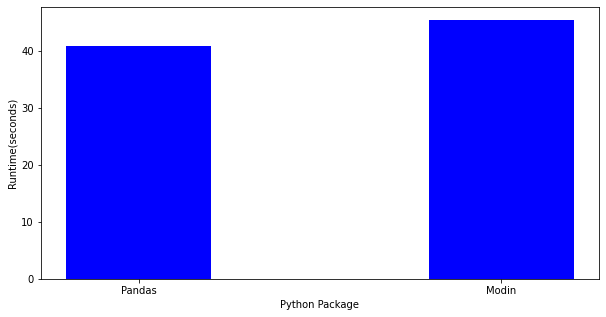

In [ ]:
t0 = time.time()
pandas_df = pandas.read_csv("foo.csv", names=["col{}".format(i) for i in range(256)])
pandas_time = time.time()- t0

t1 = time.time()
modin_df = pd.read_csv("foo.csv", names=["col{}".format(i) for i in range(256)])
modin_time = time.time() - t1

print("Pandas Time(seconds):",pandas_time,"\nModin Time(seconds):",modin_time)
verify_and_print_times(pandas_time, modin_time)
outputDict={"Pandas":pandas_time,"Modin":modin_time}
plotter(outputDict)


Other DataFrame Function Performance Example
We will now show the speedup in performance from Modin compared to stock Pandas with a few common functions.

Like before, pandas_df is for stock Pandas, modin_df is for Modin.

df.mean()

In [ ]:
# Mean
t2 = time.time()
pandas_df.mean(axis=0)
pandas_time=time.time()- t2
print(" stock Pandas wall time for completion in seconds:",pandas_time)

 stock Pandas wall time for completion in seconds: 0.4259665012359619


In [ ]:

# Mean
t3 = time.time()
modin_df.mean(axis=0)
modin_time=time.time()- t3
print("Modin wall time for completion in seconds:",modin_time)

Modin wall time for completion in seconds: 1.672074794769287


In [ ]:
verify_and_print_times(pandas_time, modin_time)

Oops, stock pandas appears to be 3.93X faster than Modin in this case. This is unlikely but could happen sometimes on certain machines/environments/datasets. One of the most probable reasons is the excessive amount of partitions being assigned to a single worker. You may visit Modin's optimization guide in order to learn more about such cases and how to fix them: 
https://modin.readthedocs.io/en/latest/usage_guide/optimization_notes/index.html

But first, verify that you're using the latest Modin version, also, try to use different executions, for basic usage we recommend non-experimental 'PandasOnRay'.
Current configuration is:
	Execution: PandasOnDask
	Is experimental: None
	Number of CPUs to utilize by Modin (check that Modin uses all CPUs on your machine): 4
	Is in debug mode (debug mode may perform slower): None
	Modin version: 0.17.1


df.applymap

In [ ]:
# Long apply function
t6 = time.time()
print(pandas_df.applymap(lambda x: x + 1))
pandas_time = time.time() - t6
print(" stock Pandas wall time for completion in seconds:",pandas_time)

          col0    col1    col2    col3    col4    col5    col6    col7  \
0       7711.0  5610.0  4011.0  9991.0  3456.0  1596.0  8923.0  4527.0   
1       5043.0  1235.0  8948.0   355.0  1427.0  4870.0  1313.0   895.0   
2       6110.0  8524.0   598.0  1511.0  1807.0  4607.0  6689.0  8055.0   
3       3739.0  1647.0  4244.0  6565.0  1980.0  2760.0  8383.0  7218.0   
4       6332.0  2563.0  1020.0  8813.0  8053.0  2958.0  6621.0  4826.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
262139  4451.0  2146.0  7168.0  2162.0  2378.0  9064.0  1542.0  5948.0   
262140  7060.0  5359.0  8955.0  3824.0  1542.0  8983.0  3326.0  2883.0   
262141  3808.0  3087.0  9730.0  2004.0  7239.0  1594.0   495.0   959.0   
262142  4344.0  5454.0   198.0  3752.0   530.0  5990.0  7607.0  8631.0   
262143  5176.0  9288.0  3283.0  8522.0  9898.0  7375.0  2171.0  3943.0   

          col8    col9  ...  col246  col247  col248  col249  col250  col251  \
0       6483.0  5609.0  ...  691

In [ ]:
# Long apply function
t7 = time.time()
print(modin_df.applymap(lambda x: x + 1))
modin_time = time.time() - t7
print("Modin wall time for completion in seconds:",modin_time)



          col0    col1    col2    col3    col4    col5    col6    col7  \
0       7711.0  5610.0  4011.0  9991.0  3456.0  1596.0  8923.0  4527.0   
1       5043.0  1235.0  8948.0   355.0  1427.0  4870.0  1313.0   895.0   
2       6110.0  8524.0   598.0  1511.0  1807.0  4607.0  6689.0  8055.0   
3       3739.0  1647.0  4244.0  6565.0  1980.0  2760.0  8383.0  7218.0   
4       6332.0  2563.0  1020.0  8813.0  8053.0  2958.0  6621.0  4826.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
262139  4451.0  2146.0  7168.0  2162.0  2378.0  9064.0  1542.0  5948.0   
262140  7060.0  5359.0  8955.0  3824.0  1542.0  8983.0  3326.0  2883.0   
262141  3808.0  3087.0  9730.0  2004.0  7239.0  1594.0   495.0   959.0   
262142  4344.0  5454.0   198.0  3752.0   530.0  5990.0  7607.0  8631.0   
262143  5176.0  9288.0  3283.0  8522.0  9898.0  7375.0  2171.0  3943.0   

          col8    col9  ...  col246  col247  col248  col249  col250  col251  \
0       6483.0  5609.0  ...  691

In [ ]:

verify_and_print_times(pandas_time, modin_time)

Modin was 2.15X faster than stock pandas!


pd.concat([df, df])

In [ ]:
# Concat
t8 = time.time()
print(pandas.concat([pandas_df, pandas_df], axis=0))
pandas_time = time.time() - t8
print("stock Pandas wall time for completion in seconds:",pandas_time)

          col0    col1    col2    col3    col4    col5    col6    col7  \
0       7710.0  5609.0  4010.0  9990.0  3455.0  1595.0  8922.0  4526.0   
1       5042.0  1234.0  8947.0   354.0  1426.0  4869.0  1312.0   894.0   
2       6109.0  8523.0   597.0  1510.0  1806.0  4606.0  6688.0  8054.0   
3       3738.0  1646.0  4243.0  6564.0  1979.0  2759.0  8382.0  7217.0   
4       6331.0  2562.0  1019.0  8812.0  8052.0  2957.0  6620.0  4825.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
262139  4450.0  2145.0  7167.0  2161.0  2377.0  9063.0  1541.0  5947.0   
262140  7059.0  5358.0  8954.0  3823.0  1541.0  8982.0  3325.0  2882.0   
262141  3807.0  3086.0  9729.0  2003.0  7238.0  1593.0   494.0   958.0   
262142  4343.0  5453.0   197.0  3751.0   529.0  5989.0  7606.0  8630.0   
262143  5175.0  9287.0  3282.0  8521.0  9897.0  7374.0  2170.0  3942.0   

          col8    col9  ...  col246  col247  col248  col249  col250  col251  \
0       6482.0  5608.0  ...  691

In [ ]:
# Concat
t9 = time.time()
modin_df1=pd.Series([modin_df])
print(pd.concat([modin_df1,modin_df1],axis=0))
modin_time = time.time() - t9
print("Modin wall time for completion in seconds:",modin_time)

0    [col0, col1, col2, col3, col4, col5, col6, col...
0    [col0, col1, col2, col3, col4, col5, col6, col...
dtype: object
Modin wall time for completion in seconds: 6.59968638420105


In [ ]:
verify_and_print_times(pandas_time, modin_time)

Oops, stock pandas appears to be 3.82X faster than Modin in this case. This is unlikely but could happen sometimes on certain machines/environments/datasets. One of the most probable reasons is the excessive amount of partitions being assigned to a single worker. You may visit Modin's optimization guide in order to learn more about such cases and how to fix them: 
https://modin.readthedocs.io/en/latest/usage_guide/optimization_notes/index.html

But first, verify that you're using the latest Modin version, also, try to use different executions, for basic usage we recommend non-experimental 'PandasOnRay'.
Current configuration is:
	Execution: PandasOnDask
	Is experimental: None
	Number of CPUs to utilize by Modin (check that Modin uses all CPUs on your machine): 4
	Is in debug mode (debug mode may perform slower): None
	Modin version: 0.17.1


Modin Coverage Examples
The Modin package supports a large variety of Pandas functions. Here are some examples:

Count

In [ ]:
modin_df.count()

col0      262144
col1      262144
col2      262144
col3      262144
col4      262144
           ...  
col251    262144
col252    262144
col253    262144
col254    262144
col255    262144
Length: 256, dtype: int64

Filter

In [ ]:
modin_df.filter(regex='0$', axis=1)

,col0,col10,col20,col30,col40,col50,col60,col70,col80,col90,...,col160,col170,col180,col190,col200,col210,col220,col230,col240,col250
0,7710.0,6821.0,5662.0,3649.0,3078.0,2683.0,5854.0,5011.0,9814.0,832.0,...,4301.0,8880.0,1574.0,1966.0,1672.0,2584.0,2771.0,3211.0,9697.0,4886.0
1,5042.0,4561.0,8588.0,1193.0,8278.0,7106.0,3026.0,8791.0,8695.0,1071.0,...,4827.0,1745.0,114.0,1107.0,8357.0,2072.0,1445.0,2095.0,1388.0,5327.0
2,6109.0,5995.0,4601.0,9415.0,978.0,5031.0,7292.0,7025.0,150.0,8634.0,...,7243.0,7338.0,6430.0,5924.0,8400.0,3988.0,5896.0,458.0,7130.0,8089.0
3,3738.0,9548.0,5241.0,8650.0,4034.0,752.0,686.0,5520.0,9057.0,2396.0,...,9419.0,7690.0,8162.0,1513.0,6206.0,3904.0,923.0,5303.0,4790.0,7962.0
4,6331.0,3819.0,8196.0,5564.0,1475.0,975.0,2287.0,4839.0,8561.0,1127.0,...,8746.0,2923.0,6168.0,517.0,6376.0,7359.0,2977.0,8133.0,142.0,929.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262139,4450.0,9183.0,6973.0,3084.0,4698.0,2474.0,8933.0,6681.0,6687.0,2935.0,...,3262.0,7581.0,544.0,4727.0,6137.0,2871.0,3764.0,975.0,7952.0,2034.0
262140,7059.0,6869.0,5328.0,4330.0,5367.0,7721.0,5408.0,754.0,8479.0,8305.0,...,479.0,5395.0,3287.0,2085.0,9329.0,3006.0,6365.0,2467.0,4948.0,679.0
262141,3807.0,3434.0,7535.0,7349.0,6576.0,1763.0,1906.0,314.0,2483.0,3166.0,...,7586.0,1226.0,6095.0,4955.0,1325.0,7735.0,5612.0,4417.0,1511.0,8502.0
262142,4343.0,3830.0,7698.0,3874.0,3164.0,5409.0,2666.0,9549.0,2886.0,7354.0,...,8357.0,2150.0,354.0,4522.0,5091.0,6511.0,1402.0,8750.0,1197.0,1188.0


iloc

In [ ]:
modin_df.iloc[0]
modin_df.iloc[-1]
modin_df.iloc[:,0]
modin_df.iloc[:,-1]

0         1103.0
1         1631.0
2         3017.0
3         5212.0
4         4915.0
           ...  
262139    5928.0
262140    7993.0
262141     957.0
262142    4648.0
262143    3519.0
Name: col255, Length: 262144, dtype: float64

Series

In [ ]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

Series to NumPy Array

In [ ]:
ser = pd.Series(pd.date_range('2000', periods=2, tz="CET"))
ser.to_numpy(dtype=object)
ser.to_numpy(dtype="datetime64[ns]")

array(['1999-12-31T23:00:00.000000000', '2000-01-01T23:00:00.000000000'],
      dtype='datetime64[ns]')

Set Options

In [ ]:
pd.set_option('compute.use_bottleneck', False)
pd.set_option('compute.use_numexpr', False)

Unique Function for Series

In [ ]:
pd.unique(pd.Series([2, 1, 3, 3]))

array([2, 1, 3], dtype=int64)